<a href="https://colab.research.google.com/github/gebakkenAardappel/WINC/blob/main/Shark_attack_vanaf_uploadfile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("shark_attack.csv",sep=",")
#df

In [3]:
%load_ext google.colab.data_table

# Relevante kolommen behouden

In [ ]:
#kolommen die niet gebruikt gaan worden verwijderen. Bewaren: 'Activity','Type', 'Age', 'Injury', 'Fatal (Y/N)',Species
df1=df.drop(columns=['Unnamed: 0','Case Number','Sex ','Date', 'Year', 'Country', 'Area', 'Name','Time', 'Location', 'Investigator or Source','pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23' ])
# alle compleet lege rijen verwijderen
df1.dropna(how="all",inplace=True)
df1.head(2)

# Zoek non-default missing values



In [5]:
# 4 functies: cast_to_type(), unieke_waardes(), frequentie() en randwaardes()
# tegelijk aanroepen via bekijk_dataoverzicht()

def cast_to_type(df,column_name,maybe_type):
  df_column=df[column_name]
  try:
    df_column.astype(maybe_type)
    print(f"casting to type {maybe_type} succesful")
  except ValueError as error:
    print(f"could not cast to {maybe_type} : error")


def unieke_waardes(df,column_name):
  df_column=df[column_name]
  getoond=10
  unieke_waarden=df_column.unique()
  aantal_uniek=len(unieke_waarden)
  
  if aantal_uniek==len(df_column):
    print(f"alle waardes zijn uniek")
  elif aantal_uniek<getoond:
    print(f"minder dan {getoond} waardes zijn uniek") 
    try:
      sorted = np.sort(unieke_waarden)    # sorteer lijst en print.              
      print("Values are sorted")                                                 
      display(list(sorted))
    except:
      print("Could not sort values")      # indien onsorteerbaar print ongesorteerde lijst
      display(list(unieke_waarden))       
  else:
    print(f"{aantal_uniek} van de {len(df_column)} waarden zijn uniek")
  

def randwaardes(df,column_name): 
  df_column=df[column_name] 
  print(f"kop_staart" )
  toon=10
  def kop_staart(sorted):                         # inner-functie aanroepen na wel/niet verwijderen nul waardes       
    display(f"eerste {toon}:{list(sorted[:toon])}")
    display(f"laatste {toon}: {list(sorted[-toon:])}")
  try:
    sorted=np.sort(df_column.unique())            #unieke waardes sorteren
    kop_staart(sorted)
  except TypeError as error:
    print("onsorteerbare lijst. Nul waardes zijn verwijderd")
    niet_nul_uniek = df.loc[~df[column_name].isnull(), column_name].unique()    #en dus niet   "niet_nul_uniek=(~df_column.isnull())""
    sorted=np.sort(niet_nul_uniek)
    kop_staart(sorted)


def frequentie(df,column_name):
  df_column=df[column_name]
  print(f"frequenties: ")
  display(df_column.value_counts(dropna=False))  # toon nan waardes ook


def bekijk_dataoverzicht(df,column_name,maybe_type):
  print(20*'-', column_name , 20*'-')
  cast_to_type(df,column_name,maybe_type)
  print(40*"-")
  unieke_waardes(df,column_name)
  print(40*"-")
  randwaardes(df,column_name)
  print(40*"-")
  frequentie(df,column_name)

In [6]:
df1.dropna(subset=["Species "],inplace=True)  # alleen als er een haai betrokken is data bekijken

# Species kolom opschonen

In [7]:
# ongeldige waardes of niet bevestigde betrokkenheid van haaien vervangen door nan
df1.loc[df1["Species "]=="Shark involvement prior to death was not confirmed", "Species "]=np.nan
df1.loc[df1["Species "]=="Shark involvement not confirmed", "Species "]=np.nan
df1.loc[df1["Species "]=="Shark involvement prior to death unconfirmed", "Species "]=np.nan
df1.loc[df1["Species "]== "Questionable", "Species "]=np.nan
df1.loc[df1["Species "]=="Invalid " , "Species "]=np.nan
df1.loc[df1["Species "]=="Invalid" , "Species "]=np.nan

In [8]:
# Species: sommige species zijn genoemd binnen zin: aanwezigheid soortnaam bepalen en zin aanpassen. Alles lowercase.
# Omdat een mask niet kan als er nan inzitten, deze eruit filteren :  (bevat white & niet-nan) in kolom Species -> wordt ....

totaal=["tiger","bull","blue pointer","white","whaler","blacktip","grey nurse","lemon","hammerhead","cat","gummy","dusky","galapagos","raggedtooth","sandbar","sevengill",
       "tawney","wobbegong","reef","brown", "pack","blue nose","dog","nurse","spinner","goblin","leopard","shark","sharks"]
soortnamen=["tiger","bull","blue pointer","white","whaler","blacktip","grey nurse","lemon","hammerhead","cat","gummy","dusky","galapagos","raggedtooth","sandbar","sevengill",
       "tawney","wobbegong","reef","brown", "pack","blue nose","dog","nurse","spinner","goblin","leopard"]

for naam in totaal:
  if (naam in soortnamen):  
    nieuwe_naam=""+naam    #print(nieuwe_naam)  
    df1.loc[(df1['Species '].str.lower().str.contains(naam)) & (~df1["Species "].isna()),   "Species "]= f"{nieuwe_naam}"
  else:  # shark zit nu natuurlijk wel in alle namen als ik dat hierboven gelijk zou toevoegen
    df1.loc[(df1['Species '].str.lower().str.contains(naam)) & (~df1["Species "].isna()),   "Species "]= "unknown"  #print(nieuwe_naam) 

for naam in totaal:
  if(naam in soortnamen):
    df1.loc[(df1['Species '].str.lower().str.contains(naam)) & (~df1["Species "].isna()), "Species "]=f"{naam} shark"

df1.loc[df1["Species "]=="Unidentified species" , "Species "]="unknown"
df1.head(2)

,Type,Activity,Age,Injury,Fatal (Y/N),Species
0,Boating,Paddling,57,"No injury to occupant, outrigger canoe and pad...",N,white shark
3,Unprovoked,Surfing,NaN,Minor injury to lower leg,N,unknown


In [9]:
#bekijk_dataoverzicht(df1 ,"Species ",str)

# Vraag: wat zijn de meest gevaarlijke haaien voor mensen


In [10]:
df2=df1.loc[:,["Species ",'Fatal (Y/N)']]
df2.head(2)

,Species,Fatal (Y/N)
0,white shark,N
3,unknown,N


In [11]:
#selecteer de fatale aanvallen
fatal=(df2['Fatal (Y/N)']=='Y') # geeft een boolean voor wel /niet fataal
# df2: overzicht fatale aanvallen
df2=df2.loc[fatal].copy()

# meest frequent betrokken bij aanvallen
df3=df2['Species '].value_counts(dropna=True)  
# bovenstaande geeft een series. Deze omzetten naar frame:
df3_attacks = df3.to_frame()                       
df3_attacks.rename(columns={"Species ":"Number of fatal attacks"}, inplace=True)
df3_attacks["Species"]=df3.index
df3_attacks.reset_index(inplace=True, drop=True)
df3_attacks.sort_values(by=["Number of fatal attacks"], ascending=False)
# verwijder data van onbekende soorten
df3_attacks["Species"].replace("unknown",np.nan,inplace=True)
df3_attacks.dropna(subset=["Species"],inplace=True)

# gebruik de meest relevante rijen 
attacks=df3_attacks.loc[:7,["Number of fatal attacks","Species"]]
attacks.head(1)

,Number of fatal attacks,Species
0,149,white shark


In [12]:
# andere manier van plotten voor alleen valuecounts zie onder bij def plot_valuecounts() 

def plot_data(df,xColumn,yColumn,yLabel,Title):
  fig, ax = plt.subplots()     
  x=df[xColumn]  
  y=df[yColumn]  

  ax.bar(x,y)
  plt.xlabel(xColumn)
  plt.ylabel(yLabel)
  plt.title(Title)

  fig.set_size_inches(15,3)
  plt.show()

# value_counts() rechtstreeks plotten




In [13]:
# descending:    df.kolomnaam.valuecounts().plot(kind="bar")                           
# ascending:     df.kolomnaam.value_counts().sort_values().plot(kind="bar")                
# hoogste 10:    df['kolomnaam'].value_counts(sort=True).nlargest(10).plot.bar()       

def plot_valuecounts(df,kolomnaam,titel,y_label):

  plt.xlabel(f"{kolomnaam}")
  plt.ylabel(y_label)
  plt.title(f"{titel}")
  plt.rcParams["figure.figsize"] = (2,5)
  df[kolomnaam].value_counts().plot(kind="bar")

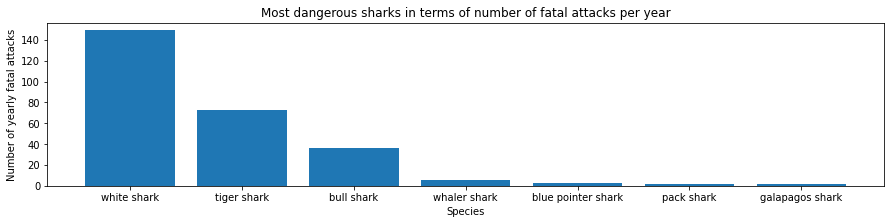

In [14]:
plot_data(attacks,"Species","Number of fatal attacks","Number of yearly fatal attacks","Most dangerous sharks in terms of number of fatal attacks per year")

#Vraag: lopen kinderen meer risico om door een haai aangevallen te worden

In [15]:
# kinderen: <18 jaar, volwassenen >=18 jaar. Of kinderen echt meer risico lopen weet je niet: aantal zwemmers etc. per groep is niet bekend
#bekijk_dataoverzicht(df1 ,"Age",str)

In [ ]:
age_risk=df1.loc[:,["Age","Fatal (Y/N)"]]
# vervang missing/incorrecte values door np.nan
age_risk['Age'].replace("MAKE LINE GREEN",np.nan,inplace=True)
age_risk['Age'].replace("A.M.",np.nan,inplace=True)
age_risk['Age'].replace("F",np.nan,inplace=True)
age_risk['Age'].replace("X",np.nan,inplace=True)
age_risk['Age'].replace("Elderly","adult",inplace=True)
age_risk.dropna(subset=["Age"],inplace=True)

# vervang middle-age, (adult), adult, mid-20,mid-30 etc. door "adult":
adult=["(adult)","middle-age", "adult","mid-20","mid-20s","mid-30","mid-30s","Elderly"]
# jaartallen van 18-98 ook toevoegen aan de lijst:
for i in range (80):
  a=(i+18)
  adult.append(str(a))

for leeftijd in adult:
  if leeftijd in adult:
    age_risk.loc[ (age_risk["Age"].str.lower().str.contains(leeftijd)) &( ~age_risk["Age"].isna() ) , ["Age"]]= "adults"

# de overige leeftijden behoren bij "children":
age_risk.loc[age_risk["Age"]!="adults","Age"]="children"

#bekijk_dataoverzicht(age_risk ,"Age",str)

In [17]:
risk=age_risk["Age"].value_counts()
risks=risk.to_frame()
risks["index"]=risk.index
risks.rename(columns={"level_0":"index","Age":"Number of attacks","index":"Age"},inplace=True)
risks.reset_index(inplace=True, drop=True)
risks

,Number of attacks,Age
0,1679,adults
1,513,children


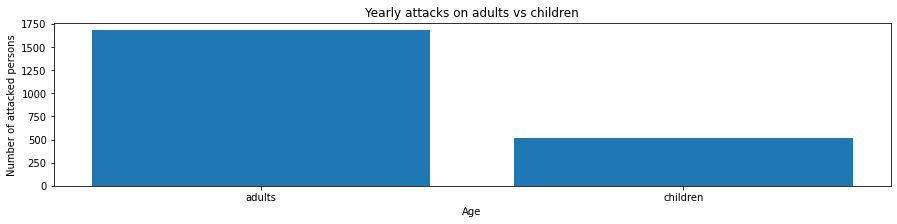

In [18]:
plot_data(risks,"Age","Number of attacks","Number of attacked persons","Yearly attacks on adults vs children")

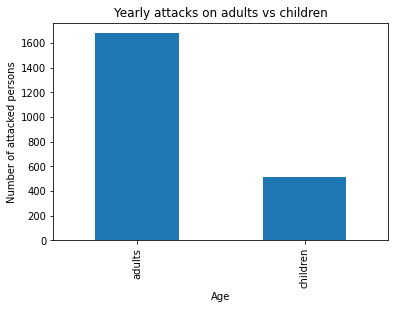

In [19]:
plot_valuecounts(age_risk,"Age","Yearly attacks on adults vs children", "Number of attacked persons")

#Vraag: zijn aanvallen waarin haaien geprovoceerd worden gevaarlijker of niet

In [20]:
# maak df met daarin type (geprovoceerd), injury en fatal
interaction=df1.loc[:,["Type","Fatal (Y/N)"]]   # "Injury" eruit gehaald. Deze kolom is moeilijk te beoordelen
interaction.head(1)

,Type,Fatal (Y/N)
0,Boating,N


In [21]:
#bekijk_dataoverzicht(interaction,"Type",str)

In [22]:
# vervangen of verwijderen van ongeldige waardes in Type
interaction["Type"].replace("Invalid",np.nan,inplace=True)
interaction["Type"].replace("Questionable",np.nan,inplace=True)
interaction["Type"].replace("Sea Disaster",np.nan,inplace=True)
interaction["Type"].replace("Boating","Unprovoked",inplace=True)
interaction["Type"].replace("Boat","Unprovoked",inplace=True)
interaction["Type"].replace("unprovoked","Unprovoked",inplace=True)

interaction.dropna(subset=["Type"],inplace=True)
#bekijk_dataoverzicht(interaction,"Type",str)

# verwijderen ongeldige waardes in Fatal
interaction["Fatal (Y/N)"].replace("UNKNOWN",np.nan,inplace=True)
interaction["Fatal (Y/N)"].replace("M",np.nan,inplace=True)
interaction["Fatal (Y/N)"].replace("2017",np.nan,inplace=True)
interaction["Fatal (Y/N)"].replace(" N","N",inplace=True)

interaction.dropna(subset=["Fatal (Y/N)"],inplace=True)
#bekijk_dataoverzicht(interaction,"Fatal (Y/N)",str)

In [23]:
# percentage survivors per type interactie bepalen
Prov_surv=len(interaction.loc[((interaction["Type"]=="Provoked") & (interaction["Fatal (Y/N)"]=="N")), "Type"])
Prov_died=len(interaction.loc[((interaction["Type"]=="Provoked") & (interaction["Fatal (Y/N)"]=="Y")), "Type"])
Unprov_surv=len(interaction.loc[((interaction["Type"]=="Unprovoked") & (interaction["Fatal (Y/N)"]=="N")), "Type"])
Unprov_died=len(interaction.loc[((interaction["Type"]=="Unprovoked") & (interaction["Fatal (Y/N)"]=="Y")), "Type"])

Provoked_percentage_survived=Prov_surv/(Prov_surv +Prov_died)*100
Unprovoked_percentage_survived=Unprov_surv/(Unprov_surv+Unprov_died)*100
#display(Prov_surv,Prov_died,Unprov_surv,Unprov_died) 400 vd 407 overleven bij geprovoceerd vs   2077 vd 2470 bij ongeprovoceerd

#maak een nieuw dataframe voor het % fatale incidenten
prov=pd.DataFrame(columns=["Provokation type","Percentage survivors"])
#data toevoegen
prov=prov.append({"Provokation type": "Unprovoked","Percentage survivors": Unprovoked_percentage_survived },ignore_index=True)
prov=prov.append({"Provokation type": "Provoked","Percentage survivors": Provoked_percentage_survived },ignore_index=True)
prov

,Provokation type,Percentage survivors
0,Unprovoked,84.089069
1,Provoked,98.280098


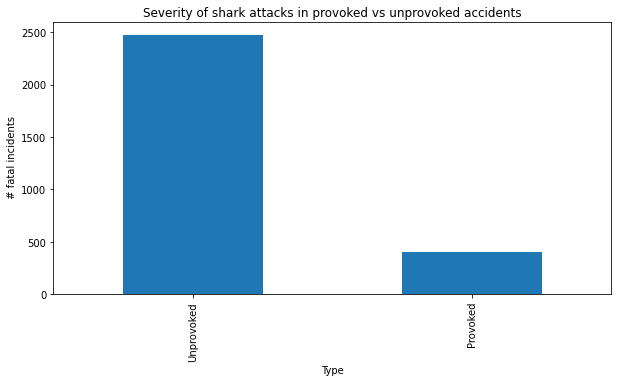

In [39]:
plot_valuecounts(interaction,"Type", "Severity of shark attacks in provoked vs unprovoked accidents", " # fatal incidents")

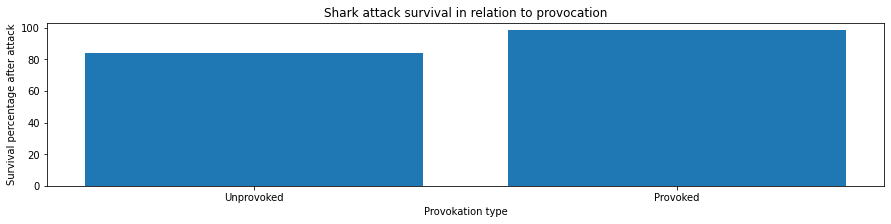

In [25]:
plot_data(prov,"Provokation type","Percentage survivors","Survival percentage after attack","Shark attack survival in relation to provocation")

#Vraag: zijn bepaalde activiteiten gevoeliger voor het uitlokken van een aanval

In [26]:
# gebruik de kolommen activity en het aantal incidenten. Fataal of niet maakt niet uit
act=df1.loc[:,["Activity"]]

In [ ]:
#bekijk_dataoverzicht(act,"Activity",str)

In [ ]:
# trefwoordenlijst samenstellen
activiteiten=['paddling','swimming','surfing','bathing','floating','fishing', 'wading','bodyboarding', 
              'spearfishing','diving', 'snorkeling', 'skiing','disaster','boating', 'snorkeling',"canoeing"] 
disaster=["torpedoed", "sunk","sank","capsized","accident","wrecked","abducted","plinged","foundered", "plunged",
          "sinking", 'air','burning','ditched','broke','wreck','plane','submerged',"swamped","collision"]
boating=["raft","adrift","yachting","paddling","boat","zodiac","dinghy"]   
hunting_shark=["hooked shark","kill a shark", "anesthetize shark", "net shark", "lasso","catching sharks", 
               "killing sharks","kill a shark","killing a shark","netted shark","wrangling a shark"]    
feeding_sharks=["chumming","feeding"] 
disturbing_sharks=["grabbing shark","tagging sharks","Teasing a shark","Petting a shark", "pulling shark", "picking up shark"]

alles= activiteiten + disaster +boating + hunting_shark + feeding_sharks +disturbing_sharks



for activiteit in alles:
  if activiteit in activiteiten:
    act.loc[( (act["Activity"].str.lower().str.contains(activiteit)) & (~act['Activity'].isna())), "Activity"]=f"{activiteit}"
  elif activiteit in disaster:
    act.loc[( (act["Activity"].str.lower().str.contains(activiteit)) & (~act['Activity'].isna())), "Activity"]="disaster"
  elif activiteit in hunting_shark: 
    act.loc[( (act["Activity"].str.lower().str.contains(activiteit)) & (~act['Activity'].isna())), "Activity"]="shark hunting" 
  elif activiteit in feeding_sharks: 
    act.loc[( (act["Activity"].str.lower().str.contains(activiteit)) & (~act['Activity'].isna())), "Activity"]="shark feeding" 
  elif activiteit in disturbing_sharks: 
    act.loc[( (act["Activity"].str.lower().str.contains(activiteit)) & (~act['Activity'].isna())), "Activity"]="disturbing sharks"
  else:
    act.loc[( (act["Activity"].str.lower().str.contains(activiteit)) & (~act['Activity'].isna())), "Activity"]="boating"

#replacements 
act.loc[( (act["Activity"].str.lower().str.contains("board")) & (~act['Activity'].isna())), "Activity"]="bodyboarding"
act.loc[( (act["Activity"].str.lower().str.contains("netting")) & (~act['Activity'].isna())), "Activity"]="hunting sharks"
act.loc[( (act["Activity"].str.lower().str.contains("hooked shark")) & (~act['Activity'].isna())), "Activity"]="hunting sharks"
act.loc[( (act["Activity"].str.lower().str.contains("sitting")) & (~act['Activity'].isna())), "Activity"]="wading"
act.loc[( (act["Activity"].str.lower().str.contains("walking")) & (~act['Activity'].isna())), "Activity"]="wading"
act.loc[( (act["Activity"].str.lower().str.contains("dive")) & (~act['Activity'].isna())), "Activity"]="diving"
act.loc[( (act["Activity"].str.lower().str.contains("swim")) & (~act['Activity'].isna())), "Activity"]="swimming"
act.loc[( (act["Activity"].str.lower().str.contains("kayaking")) & (~act['Activity'].isna())), "Activity"]="canoeing"
act.loc[( (act["Activity"].str.lower().str.contains("fish")) & (~act['Activity'].isna())), "Activity"]="fishing"
act["Activity"].replace(".", np.nan,inplace=True)

#verwijder nan
act.dropna(subset=["Activity"],inplace=True)

#bekijk_dataoverzicht(act,'Activity',str)

<AxesSubplot:title={'center':'Shark attacks per year in relation to type of activity'}, xlabel='Activity', ylabel='Number of attacks/year'>

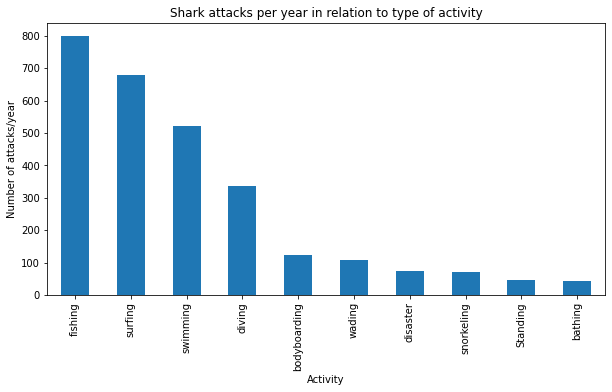

In [38]:
plt.xlabel("Activity")
plt.ylabel("Number of attacks/year")
plt.title(f"Shark attacks per year in relation to type of activity")
plt.rcParams["figure.figsize"] = (10,5)
act['Activity'].value_counts(sort=True).nlargest(10).plot(kind='bar')

Conclusie:


1.   De Witte haai is verantwoordelijk voor de meeste doden, gevolgd door de Tijgerhaai en Stierhaai
2.   Kinderen lopen niet meer risico dan volwassenen:
De meeste slachtoffers zijn volwassenen, de aantallen kinderen en volwassenen die het water ingaan zijn niet bekend, dus of volwassenen ook relatief vaker aangevallen worden is niet bekend.
3.   Provokatie leidt niet tot een hoger percentage aanvallen of doden:
Het lijkt juist tot een wat lager percentage dodelijke ongevallen te leiden.
4.   Qua activiteiten is vissen het meest gevaarlijk:
Vissen leidt het vaakst tot een haaienaanval, gevolgd door surfen,zwemmen en duiken.
 

